# 04-16

---

## Project - Customer Churn

![](https://i.ytimg.com/vi/ON-iOsFK7co/maxresdefault.jpg)

## Guidelines

This is your project!

Start exploring the data and aim for the best score 🏆

> ⚠️ **Warning**: Remember, don't go too fast into modeling and predictions. In order to build great models, you first need to spend some time on data exploration, cleaning, visualization, feature engineering, etc.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [139]:
from sklearn.metrics import f1_score, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

In [112]:
import lightgbm as lgbm
import xgboost as xgb

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

In [22]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataset contains about 7000 customers with 19 features.

**Features** are the following:
- `customerID`: a unique ID for each customer
- `gender`: the gender of the customer
- `SeniorCitizen`: whether the customer is a senior (i.e. older than 65) or not
- `Partner`: whether the customer has a partner or not
- `Dependents`: whether the customer has people to take care of or not
- `tenure`: the number of months the customer has stayed
- `PhoneService`: whether the customer has a phone service or not
- `MultipleLines`: whether the customer has multiple telephonic lines or not
- `InternetService`: the kind of internet services the customer has (DSL, Fiber optic, no)
- `OnlineSecurity`: what online security the customer has (Yes, No, No internet service)
- `OnlineBackup`: whether the customer has online backup file system (Yes, No, No internet service)
- `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service)
- `TechSupport`: whether the customer has tech support or not (Yes, No, No internet service)
- `StreamingTV`: whether the customer has a streaming TV device (e.g. a TV box) or not (Yes, No, No internet service)
- `StreamingMovies`: whether the customer uses streaming movies (e.g. VOD) or not (Yes, No, No internet service)
- `Contract`: the contract term of the customer (Month-to-month, One year, Two year)
- `PaperlessBilling`: Whether the customer has electronic billing or not (Yes, No)
- `PaymentMethod`: payment method of the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharges`: the amount charged to the customer monthly
- `TotalCharges`: the total amount the customer paid

And the **Target** :
- `Churn`: whether the customer left or not (Yes, No)

As you can see, many features are categorical with more than 2 values. You will have to handle this.

Take time to make a proper and complete EDA: this will help you build a better model.

# First insigth of data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [24]:
df.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [25]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

### Target infos

In [26]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

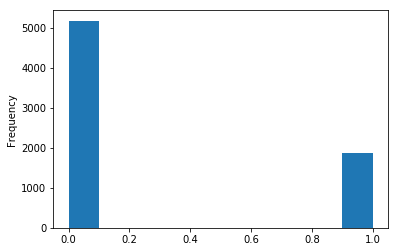

In [27]:
df['Churn'].str.replace('No', '0').str.replace('Yes', '1').astype(int).plot.hist()

In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Basic cleaning

In [29]:
df.duplicated().sum()

0

In [30]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
df = df.drop(columns=['customerID'])

### Dealing with abnormal values

In [32]:
# strip non digit values
test = pd.Series(["U$ 192.01"])
test.str.replace('^[^\d]*', '').astype(float)

0    192.01
dtype: float64

In [33]:
#df.TotalCharges = df.TotalCharges.str.replace('^[^\d]*', '')

In [34]:
col_index = df.columns.get_loc("TotalCharges")
col_index

18

In [35]:
float(df.iloc[0, df.columns.get_loc("TotalCharges")])

29.85

In [36]:
for i in range(len(df.TotalCharges)):
    print(i)
    float(df.iloc[i, col_index])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

ValueError: could not convert string to float: 

In [37]:
df.iloc[488, df.columns.get_loc("TotalCharges")]

' '

In [38]:
len(df[df['TotalCharges'] == ' '])

11

In [39]:
df.TotalCharges = df.TotalCharges.str.replace(' ', '0.0')

In [40]:
df.TotalCharges = df.TotalCharges.astype('float')

In [41]:
df[df.TotalCharges == 0.0].loc['TotalCharges'] = df.TotalCharges.mean()

/home/sunflowa/bin/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Use the pandas method to_numeric !

---

# Exploratory Data Analysis¶

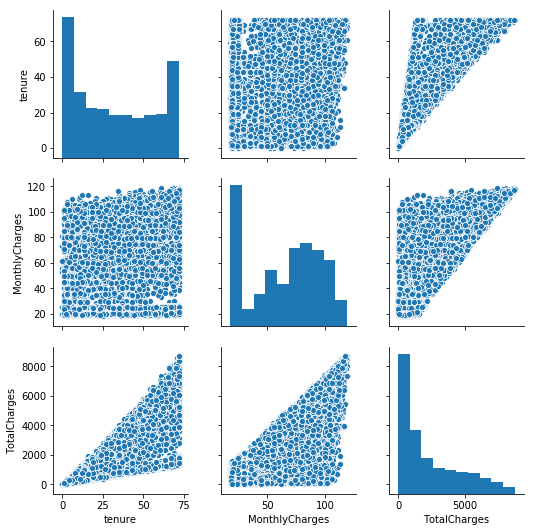

In [43]:
float_featues = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(data=df[float_featues])
plt.show()

Text(0.5,1,'TotalCharges')

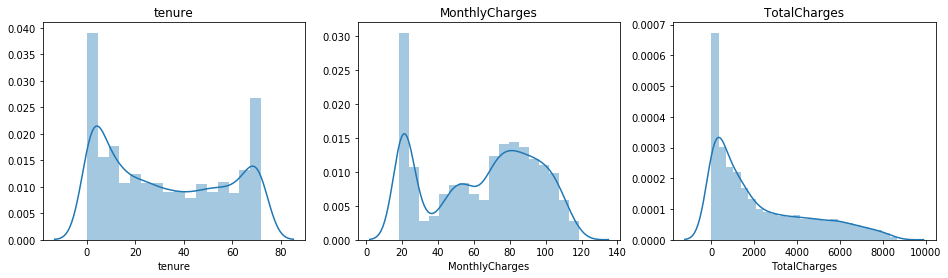

In [44]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.distplot(df['tenure'])
plt.title('tenure')

plt.subplot(1, 3, 2)
sns.distplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.subplot(1, 3, 3)
sns.distplot(df['TotalCharges'])
plt.title('TotalCharges')

In [45]:
corr = df.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


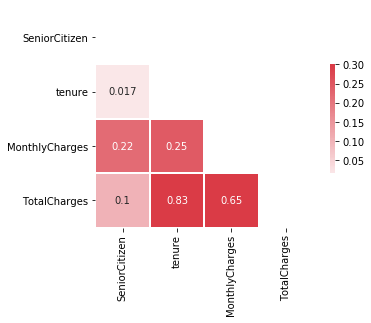

In [46]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [47]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


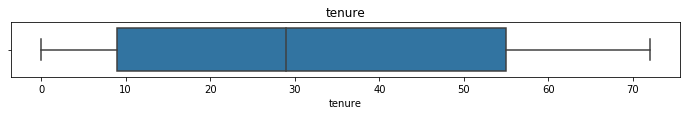

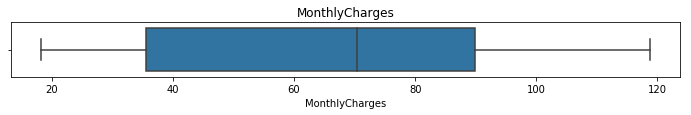

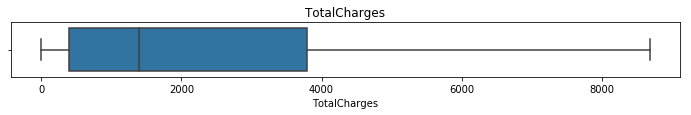

In [48]:
for c in float_featues:
    plt.figure(figsize=(12, 1))
    sns.boxplot(df[c])
    plt.title(c)
    plt.show()

In [49]:
cat_features = [c for c in df.columns if c not in float_featues]
cat_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [50]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

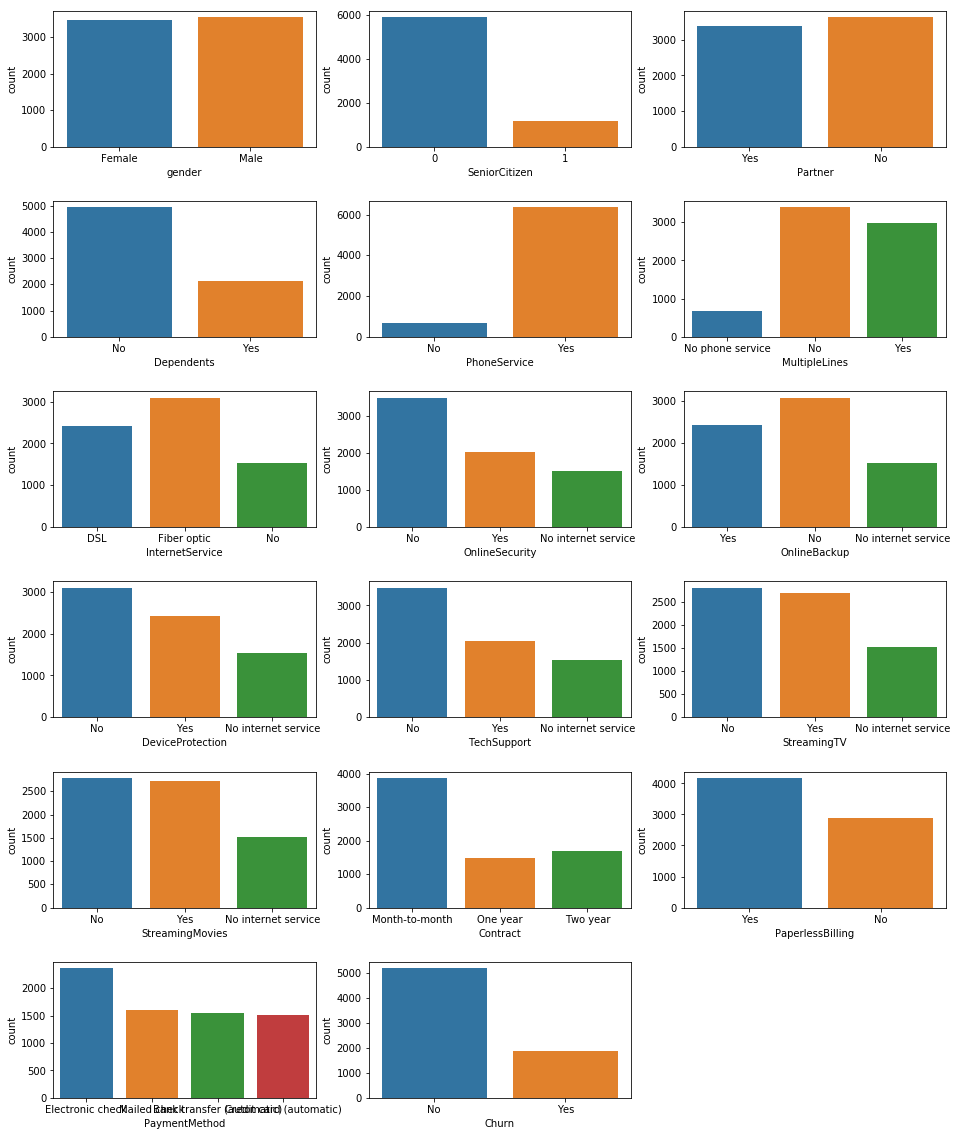

In [51]:
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.4)

for i in range(len(cat_features)):
    plt.subplot(6, 3, i+1)
    sns.countplot(df[cat_features[i]])
    #plt.title(cat_features[i])

plt.show()

In [52]:
cat_features.remove('Churn')
cat_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

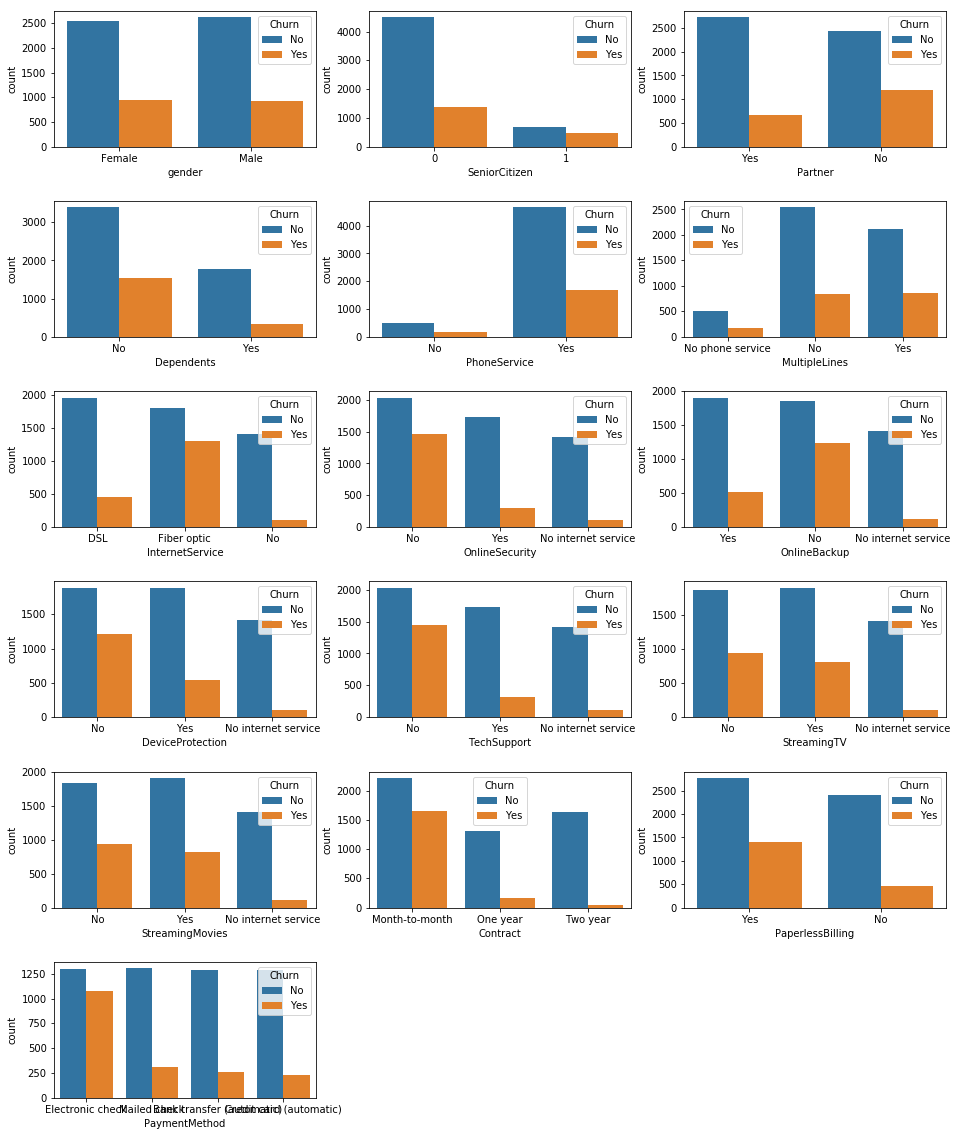

In [53]:
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.4)

for i in range(len(cat_features)):
    plt.subplot(6, 3, i+1)
    sns.countplot(df[cat_features[i]], hue=df['Churn'])
    #plt.title(cat_features[i])

plt.show()

# Data Preparing

In [54]:
y = df.Churn.str.replace('No', '0').str.replace('Yes', '1').astype(int)

In [55]:
X = pd.get_dummies(data=df, columns=cat_features, drop_first=True)
X = X.drop(columns=['Churn'])
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [56]:
X.shape, y.shape

((7043, 30), (7043,))

In [57]:
scaler = StandardScaler()
X[float_featues] = scaler.fit_transform(X[float_featues])

/home/sunflowa/bin/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sunflowa/bin/anaconda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [58]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.992611,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.066327,-0.259629,-0.172165,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,-1.236724,-0.362660,-0.958066,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.514251,-0.746535,-0.193672,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,-1.236724,0.197365,-0.938874,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Baselines

In [87]:
# f1_score binary by default
def get_f1_scores(clf, model_name):
    y_train_pred, y_pred = clf.predict(X_train), clf.predict(X_test)
    print(model_name, f'\t - Training F1 score = {f1_score(y_train, y_train_pred) * 100:.2f}% / Test F1 score = {f1_score(y_test, y_pred)  * 100:.2f}%')

In [113]:
model_list = [RandomForestClassifier(),
    LogisticRegression(),
    SVC(),
    LinearSVC(),
    SGDClassifier(),
    lgb.LGBMClassifier(),
    xgb.XGBClassifier()
             ]

In [114]:
model_names = [str(m)[:str(m).index('(')] for m in model_list]

In [115]:
for model, name in zip(model_list, model_names):
    model.fit(X_train, y_train)
    get_f1_scores(model, name)

RandomForestClassifier 	 - Training F1 score = 96.15% / Test F1 score = 54.49%
LogisticRegression 	 - Training F1 score = 60.56% / Test F1 score = 58.91%
SVC 	 - Training F1 score = 55.89% / Test F1 score = 55.37%
LinearSVC 	 - Training F1 score = 60.12% / Test F1 score = 57.26%
SGDClassifier 	 - Training F1 score = 58.71% / Test F1 score = 58.32%
LGBMClassifier 	 - Training F1 score = 75.27% / Test F1 score = 57.18%
XGBClassifier 	 - Training F1 score = 62.49% / Test F1 score = 58.60%


# Training more accurately other models

print(classification_report(y_true, y_pred, target_names=target_names))

### Randomforest with weighted classes

In [117]:
y.sum(), len(y) - y.sum()

(1869, 5174)

In [133]:
rfc = RandomForestClassifier(class_weight={1:1869, 0:5174})
rfc.fit(X_train, y_train)
get_f1_scores(rfc, 'RandomForest weighted')

RandomForest weighted 	 - Training F1 score = 96.33% / Test F1 score = 52.77%


### LGBM with weighted classes

In [132]:
lgbm_w = lgb.LGBMClassifier(n_jobs = -1, class_weight={0:1869, 1:5174})
lgbm_w.fit(X_train, y_train)
get_f1_scores(lgbm_w, 'LGBM weighted')

LGBM weighted 	 - Training F1 score = 77.18% / Test F1 score = 61.02%


### XGB with ratio

In [137]:
ratio = ((len(y) - y.sum()) - y.sum()) / y.sum()
ratio

1.7683253076511503

In [142]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", scale_pos_weight=ratio)
xgb_model.fit(X_train, y_train)
get_f1_scores(xgb_model, 'XGB with ratio')

XGB with ratio 	 - Training F1 score = 67.26% / Test F1 score = 62.59%


### Adaboost

In [140]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
get_f1_scores(abc, 'Adaboost')

Adaboost 	 - Training F1 score = 61.00% / Test F1 score = 60.46%


# Using Gridsearch on XGB

In [144]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1023
           1       0.58      0.68      0.63       386

   micro avg       0.78      0.78      0.78      1409
   macro avg       0.73      0.75      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [145]:
from sklearn.model_selection import GridSearchCV

In [187]:
params = {'learning_rate':[0.175, 0.165, 0.17], 
          'max_depth':[1, 2],
          'scale_pos_weight':[1.76]}
clf_grid = GridSearchCV(xgb.XGBClassifier(), param_grid=params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.175, 0.165, 0.17], 'max_depth': [1, 2], 'scale_pos_weight': [1.76]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [188]:
clf_grid.best_score_

0.6471646957317537

In [189]:
clf_grid.best_params_

{'learning_rate': 0.17, 'max_depth': 1, 'scale_pos_weight': 1.76}

In [190]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.17, max_depth=1, scale_pos_weight=1.76)
xgb_model.fit(X_train, y_train)
get_f1_scores(xgb_model, 'XGB with ratio')

XGB with ratio 	 - Training F1 score = 64.83% / Test F1 score = 60.77%
